In [1]:
# Load the extension and set it to autoreload all modules.
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from general.spectrogram import SpectrogramLoader
from general.keras import Trainer
from svd.dataloader import SVDDataLoader
from svd.preprocessor import SVDPreprocessor
from svd.model import SVDModel

In [3]:
spectrogram_loader = SpectrogramLoader()
data_loader = SVDDataLoader(spectrogram_loader)
preprocessor = SVDPreprocessor()
trainer = Trainer(SVDModel())

In [4]:
from general.keras import prepare_session
prepare_session()

In [5]:
d = data_loader.load()
print('Loading: done!')

Loading: done!


In [6]:
preprocessor.preprocess(d)
print('Preprocessing: done!')
history = trainer.fit_model(d, early_stop=True)

Preprocessing: done!
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 531 samples, validate on 177 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
531/531 [==============================] - 4s 7ms/sample - loss: 0.7312 - acc: 0.5951 - val_loss: 0.5742 - val_acc: 0.7458
Epoch 2/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6604 - acc: 0.6177 - val_loss: 0.5748 - val_acc: 0.7232
Epoch 3/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.6161 - acc: 0.6893 - val_loss: 0.5428 - val_acc: 0.7684
Epoch 4/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.5624 - acc: 0.7326 - val_loss: 0.5200 - val_acc: 0.7684
Epoch 5/100
531/531 [==============================] - 1s 2ms/sample - loss: 0.5356 - acc: 0.7382 - val_loss: 0.5268 - val_acc: 0.7684
Epoch 6/100
531/531 [==

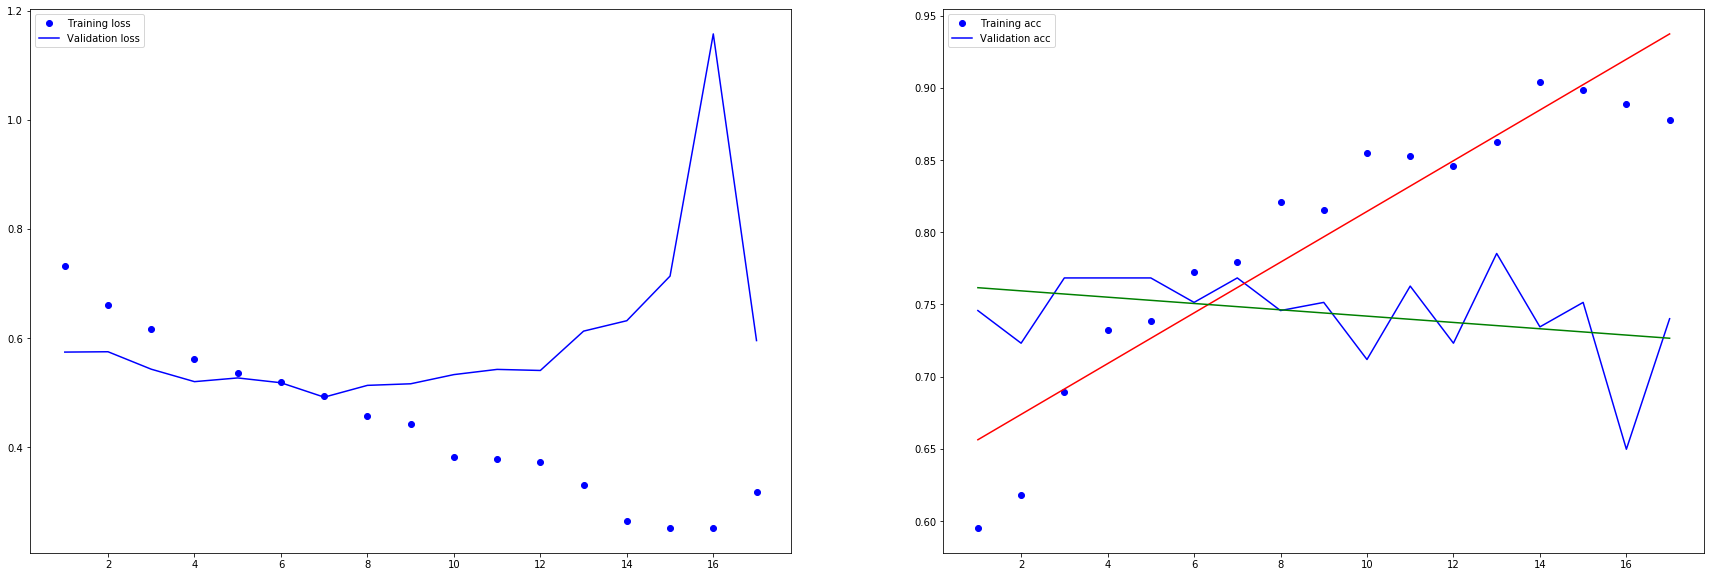

In [7]:
from general.visualization import visualize_history

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(30, 10))
visualize_history(fig, axs, 0, history)

In [8]:
trainer.evaluate(d)

177/177 [==============================] - 0s 3ms/sample - loss: 0.4760 - acc: 0.7853


[0.47603445234945263, 0.78531075]